In [80]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
import tensorflow as tf
import cv2
import numpy as np
from IPython import display
pre_trained_model = tf.keras.models.load_model('saved_model/my_model')

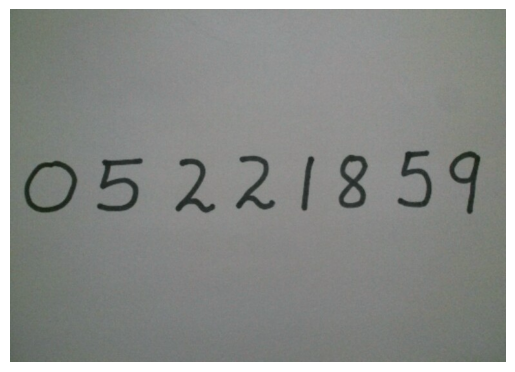

In [81]:
image = cv2.imread('data/image.jpg')
plt.axis('off')
plt.imshow(image);

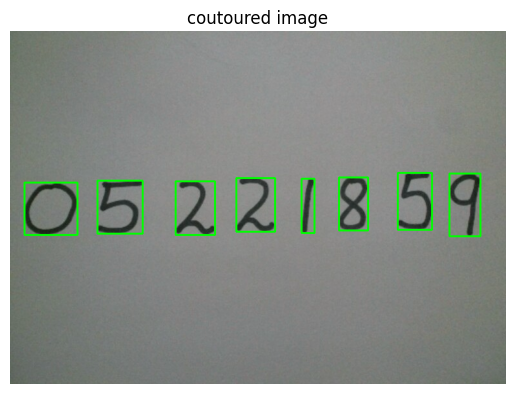

In [82]:
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(grey.copy(), (5,5), 0)
_, thresh = cv2.threshold(blur.copy(),0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours_rect = [cv2.boundingRect(c) for c in contours]

tmp = image.copy()
small_param = 0.001
preprocessed_digits = []

for x,y,w,h in sorted(contours_rect):
    
    # filter out small rect
    if w*h < small_param * tmp.shape[0] * tmp.shape[1]:
        continue
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(tmp, (x,y), (x+w, y+h), color=(0,255,0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, 5, "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
plt.title('coutoured image')
plt.axis('off')
plt.imshow(tmp, cmap="gray")
plt.show()
preprocessed_digits = np.array(preprocessed_digits)

In [83]:
def display_digits(digits, predictions, labels, title, n):
    '''
    Adapated from: https://colab.research.google.com/github/GoogleCloudPlatform/tensorflow-without-a-phd/blob/master/tensorflow-mnist-tutorial/keras_01_mnist.ipynb
    
    Author: Martin Gorner
    '''
    plt.rc('xtick', top=False, bottom=False, labelsize='large')
    plt.rc('axes', edgecolor='white')
    plt.rc('figure', facecolor='F0F0F0', figsize=(16,9))
    
    fig = plt.figure(figsize=(13,3))
    digits = np.reshape(digits, [n, 28, 28])
    digits = np.swapaxes(digits, 0, 1)
    digits = np.reshape(digits, [28, 28*n])
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    plt.xticks
    plt.grid(visible=None)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
    plt.imshow(digits, cmap = 'gray_r')
    plt.grid(None)
    plt.title(title)
    plt.rcParams.update(plt.rcParamsDefault) # reset to default

In [84]:
labels = []
for digit in preprocessed_digits:
    plt.axis('off')
    plt.imshow(digit, cmap='gray_r')
    plt.show()
    display.clear_output(wait=True)
    while (x := input()).isdigit() is False:
        print("please enter digit")
        continue
    labels.append(int(x))
display.clear_output()

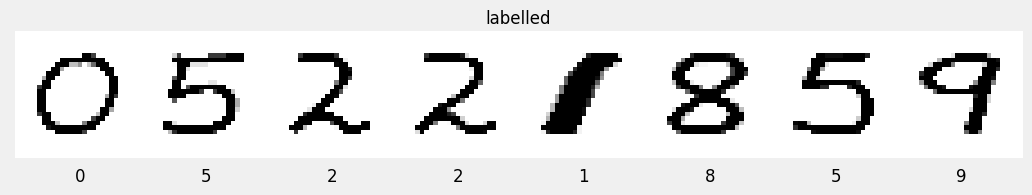

In [85]:
display_digits(preprocessed_digits, labels, labels, 'labelled', len(labels))

In [86]:
digits = tf.constant(preprocessed_digits)
digits = digits[..., tf.newaxis]
digits = tf.image.resize(digits, (28,28))
digits = digits.numpy()
digits = digits.reshape(-1,28*28)
digits.shape

(8, 784)

In [87]:
pred = pre_trained_model.predict(digits)

1/1 [==============================] - 0s 151ms/step


In [88]:
pred = [np.argmax(p) for p in pred]
pred = np.array(pred)
pred

array([0, 5, 2, 2, 1, 3, 5, 9], dtype=int64)

In [93]:
res = pred == np.array(labels)
acc = res[res].sum() / res.shape[0] * 100
acc

87.5

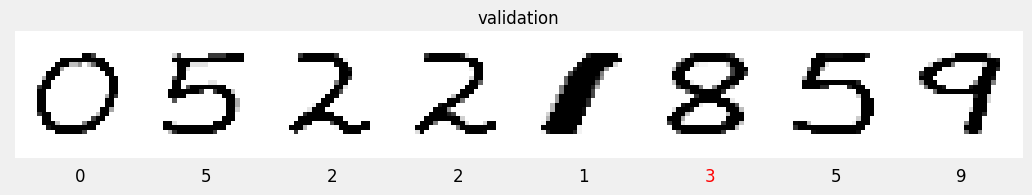

In [95]:
display_digits(preprocessed_digits, pred, labels, 'validation', pred.shape[0])